In [1]:
import pickle
import pandas as pd
from sklearn import tree

df = pd.read_csv("data-cardio/cardio_clear.csv", index_col="id")
model = pickle.load(open("data-cardio//cardio.model.sav", "rb"))
features = (
    df
    .drop(["cardio"], axis=1)
    .columns.values.tolist()
)

rules = tree.export_text(model, feature_names=features)
print(rules)

|--- ap_hi <= 129.50
|   |--- age <= 54.65
|   |   |--- cholesterol <= 2.50
|   |   |   |--- age <= 43.79
|   |   |   |   |--- cholesterol <= 1.50
|   |   |   |   |   |--- ap_hi <= 114.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- ap_hi >  114.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- cholesterol >  1.50
|   |   |   |   |   |--- bmi <= 28.87
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- bmi >  28.87
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- age >  43.79
|   |   |   |   |--- ap_hi <= 119.50
|   |   |   |   |   |--- bmi <= 22.05
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- bmi >  22.05
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- ap_hi >  119.50
|   |   |   |   |   |--- bmi <= 27.71
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- bmi >  27.71
|   |   |   |   |   |   |--- class: 0
|   |   |--- cholesterol >  2.50
|   |   |   |--- bmi <= 29.04
|   |   |   |   |--- age <= 41.

In [2]:
from src.rules import get_rules


rules = get_rules(model, features, [0, 1])
display(len(rules))
rules

63

[if (ap_hi <= 129.5) and (age <= 54.65) and (cholesterol <= 2.5) and (age <= 43.792) and (cholesterol <= 1.5) and (ap_hi <= 114.5) -> 0,
 if (ap_hi <= 129.5) and (age <= 54.65) and (cholesterol <= 2.5) and (age <= 43.792) and (cholesterol <= 1.5) and (ap_hi > 114.5) -> 0,
 if (ap_hi <= 129.5) and (age <= 54.65) and (cholesterol <= 2.5) and (age <= 43.792) and (cholesterol > 1.5) and (bmi <= 28.874) -> 0,
 if (ap_hi <= 129.5) and (age <= 54.65) and (cholesterol <= 2.5) and (age <= 43.792) and (cholesterol > 1.5) and (bmi > 28.874) -> 0,
 if (ap_hi <= 129.5) and (age <= 54.65) and (cholesterol <= 2.5) and (age > 43.792) and (ap_hi <= 119.5) and (bmi <= 22.045) -> 0,
 if (ap_hi <= 129.5) and (age <= 54.65) and (cholesterol <= 2.5) and (age > 43.792) and (ap_hi <= 119.5) and (bmi > 22.045) -> 0,
 if (ap_hi <= 129.5) and (age <= 54.65) and (cholesterol <= 2.5) and (age > 43.792) and (ap_hi > 119.5) and (bmi <= 27.71) -> 0,
 if (ap_hi <= 129.5) and (age <= 54.65) and (cholesterol <= 2.5) and

In [3]:
from src.rules import normalise_rules


rules = normalise_rules(rules)
display(len(rules))
rules

63

[if (ap_hi <= 129.5) and (age <= 54.65) and (cholesterol <= 2.5) -> 0,
 if (ap_hi <= 129.5) and (ap_hi > 114.5) and (age <= 54.65) and (cholesterol <= 2.5) -> 0,
 if (ap_hi <= 129.5) and (age <= 54.65) and (cholesterol <= 2.5) and (cholesterol > 1.5) and (bmi <= 28.874) -> 0,
 if (ap_hi <= 129.5) and (age <= 54.65) and (cholesterol <= 2.5) and (cholesterol > 1.5) and (bmi > 28.874) -> 0,
 if (ap_hi <= 129.5) and (age <= 54.65) and (age > 43.792) and (cholesterol <= 2.5) and (bmi <= 22.045) -> 0,
 if (ap_hi <= 129.5) and (age <= 54.65) and (age > 43.792) and (cholesterol <= 2.5) and (bmi > 22.045) -> 0,
 if (ap_hi <= 129.5) and (ap_hi > 119.5) and (age <= 54.65) and (age > 43.792) and (cholesterol <= 2.5) and (bmi <= 27.71) -> 0,
 if (ap_hi <= 129.5) and (ap_hi > 119.5) and (age <= 54.65) and (age > 43.792) and (cholesterol <= 2.5) and (bmi > 27.71) -> 0,
 if (ap_hi <= 129.5) and (age <= 54.65) and (cholesterol > 2.5) and (bmi <= 29.043) -> 0,
 if (ap_hi <= 129.5) and (ap_hi > 115.0) an

In [4]:
from src.rules import delete_same_rules


rules = delete_same_rules(rules)
display(len(rules))
rules

60

[if (ap_hi <= 129.5) and (age <= 54.65) and (cholesterol <= 2.5) -> 0,
 if (ap_hi <= 129.5) and (ap_hi > 114.5) and (age <= 54.65) and (cholesterol <= 2.5) -> 0,
 if (ap_hi <= 129.5) and (age <= 54.65) and (cholesterol <= 2.5) and (cholesterol > 1.5) and (bmi <= 28.874) -> 0,
 if (ap_hi <= 129.5) and (age <= 54.65) and (cholesterol <= 2.5) and (cholesterol > 1.5) and (bmi > 28.874) -> 0,
 if (ap_hi <= 129.5) and (age <= 54.65) and (age > 43.792) and (cholesterol <= 2.5) and (bmi <= 22.045) -> 0,
 if (ap_hi <= 129.5) and (age <= 54.65) and (age > 43.792) and (cholesterol <= 2.5) and (bmi > 22.045) -> 0,
 if (ap_hi <= 129.5) and (ap_hi > 119.5) and (age <= 54.65) and (age > 43.792) and (cholesterol <= 2.5) and (bmi <= 27.71) -> 0,
 if (ap_hi <= 129.5) and (ap_hi > 119.5) and (age <= 54.65) and (age > 43.792) and (cholesterol <= 2.5) and (bmi > 27.71) -> 0,
 if (ap_hi <= 129.5) and (age <= 54.65) and (cholesterol > 2.5) and (bmi <= 29.043) -> 0,
 if (ap_hi <= 129.5) and (ap_hi > 115.0) an

In [5]:
rules = [
    rule for rule in rules if rule.get_consequent() == 0 or rule.get_consequent() == 1
]
display(len(rules))
rules

57

[if (ap_hi <= 129.5) and (age <= 54.65) and (cholesterol <= 2.5) -> 0,
 if (ap_hi <= 129.5) and (ap_hi > 114.5) and (age <= 54.65) and (cholesterol <= 2.5) -> 0,
 if (ap_hi <= 129.5) and (age <= 54.65) and (cholesterol <= 2.5) and (cholesterol > 1.5) and (bmi <= 28.874) -> 0,
 if (ap_hi <= 129.5) and (age <= 54.65) and (cholesterol <= 2.5) and (cholesterol > 1.5) and (bmi > 28.874) -> 0,
 if (ap_hi <= 129.5) and (age <= 54.65) and (age > 43.792) and (cholesterol <= 2.5) and (bmi <= 22.045) -> 0,
 if (ap_hi <= 129.5) and (age <= 54.65) and (age > 43.792) and (cholesterol <= 2.5) and (bmi > 22.045) -> 0,
 if (ap_hi <= 129.5) and (ap_hi > 119.5) and (age <= 54.65) and (age > 43.792) and (cholesterol <= 2.5) and (bmi <= 27.71) -> 0,
 if (ap_hi <= 129.5) and (ap_hi > 119.5) and (age <= 54.65) and (age > 43.792) and (cholesterol <= 2.5) and (bmi > 27.71) -> 0,
 if (ap_hi <= 129.5) and (age <= 54.65) and (cholesterol > 2.5) and (bmi <= 29.043) -> 0,
 if (ap_hi <= 129.5) and (ap_hi > 115.0) an

In [6]:
from src.rules import simplify_rules

rules = simplify_rules(df, rules)
display(len(rules))
rules

57

[if (ap_hi = 7) and (age = 29.564) and (cholesterol = 1) -> 0,
 if (ap_hi = 122.0) and (age = 29.564) and (cholesterol = 1) -> 0,
 if (ap_hi = 7) and (age = 29.564) and (cholesterol = 2.0) and (bmi = 3.472) -> 0,
 if (ap_hi = 7) and (age = 29.564) and (cholesterol = 2.0) and (bmi = 298.667) -> 0,
 if (ap_hi = 7) and (age = 49.221) and (cholesterol = 1) and (bmi = 3.472) -> 0,
 if (ap_hi = 7) and (age = 49.221) and (cholesterol = 1) and (bmi = 298.667) -> 0,
 if (ap_hi = 124.5) and (age = 49.221) and (cholesterol = 1) and (bmi = 3.472) -> 0,
 if (ap_hi = 124.5) and (age = 49.221) and (cholesterol = 1) and (bmi = 298.667) -> 0,
 if (ap_hi = 7) and (age = 29.564) and (cholesterol = 3) and (bmi = 3.472) -> 0,
 if (ap_hi = 122.25) and (age = 29.564) and (cholesterol = 3) and (bmi = 3.472) -> 0,
 if (ap_hi = 7) and (age = 29.564) and (cholesterol = 3) and (bmi = 298.667) -> 0,
 if (ap_hi = 7) and (age = 47.2) and (cholesterol = 3) and (bmi = 298.667) -> 1,
 if (ap_hi = 7) and (age = 54.329) 

In [7]:
df.describe().transpose()

count        mean        std        min         25%  \
age          68985.0   53.290421   6.757633  29.564122   48.340817   
ap_hi        68985.0  126.325027  17.698621   7.000000  120.000000   
cholesterol  68985.0    1.364384   0.678691   1.000000    1.000000   
cardio       68985.0    0.494905   0.499978   0.000000    0.000000   
bmi          68985.0   27.524761   6.081130   3.471784   23.875115   

                    50%         75%         max  
age           53.939875   58.380791   64.924433  
ap_hi        120.000000  140.000000  240.000000  
cholesterol    1.000000    1.000000    3.000000  
cardio         0.000000    1.000000    1.000000  
bmi           26.346494   30.119376  298.666667

/Users/user/Projects/python/fuzzy-rules-generator/.venv/lib/python3.12/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


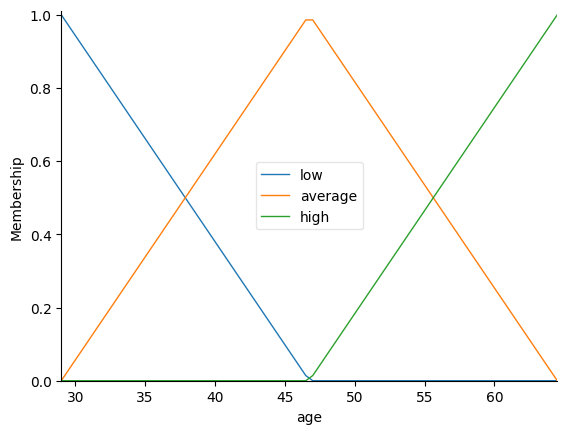

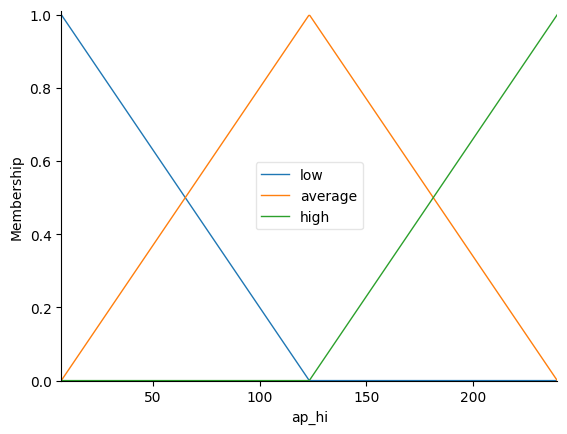

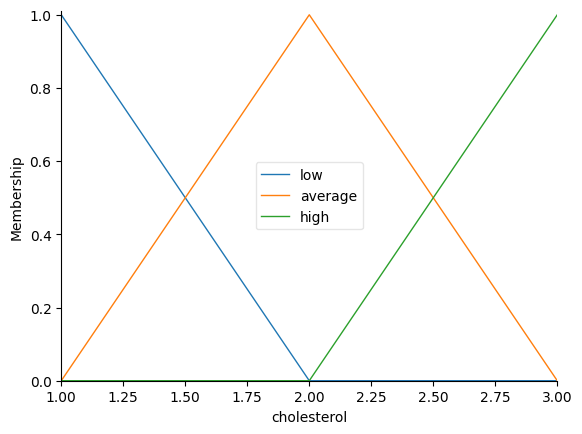

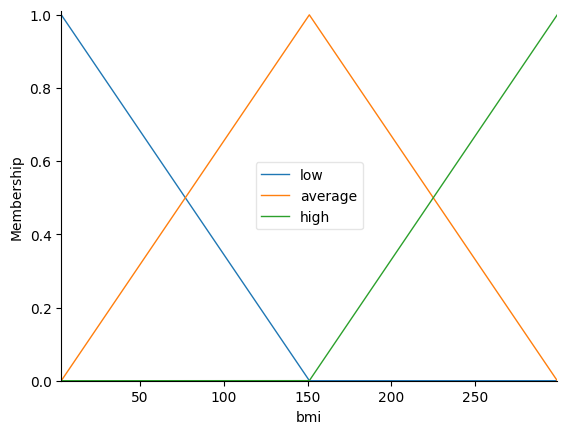

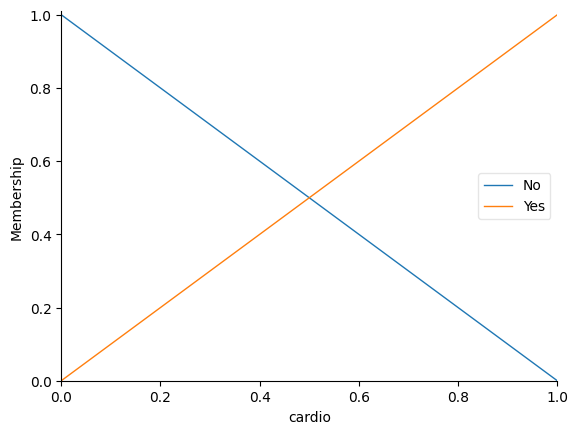

In [8]:
import numpy as np
from skfuzzy import control as ctrl
import skfuzzy as fuzz

age = ctrl.Antecedent(np.arange(29, 65, 0.5), "age")
ap_hi = ctrl.Antecedent(np.arange(7, 240, 0.5), "ap_hi")
cholesterol = ctrl.Antecedent([1, 2, 3], "cholesterol")
bmi = ctrl.Antecedent(np.arange(3, 299, 0.05), "bmi")
cardio = ctrl.Consequent([0, 1], "cardio")

age.automf(3, variable_type="quant")
age.view()
ap_hi.automf(3, variable_type="quant")
ap_hi.view()
cholesterol.automf(3, variable_type="quant")
cholesterol.view()
bmi.automf(3, variable_type="quant")
bmi.view()
cardio.automf(2, variable_type="quant", names=["No", "Yes"])
cardio.view()

In [9]:
from src.rules import get_fuzzy_rules

fuzzy_variables = {
    "age": age,
    "ap_hi": ap_hi,
    "cholesterol": cholesterol,
    "bmi": bmi,
    "consequent": cardio,
}
fuzzy_rules = get_fuzzy_rules(rules, fuzzy_variables)

fuzzy_cntrl = ctrl.ControlSystem(fuzzy_rules)

sim = ctrl.ControlSystemSimulation(fuzzy_cntrl, lenient=False)

display(len(fuzzy_rules))
fuzzy_rules

40

[IF (ap_hi[low] AND age[low]) AND cholesterol[low] THEN cardio[No]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (ap_hi[average] AND age[low]) AND cholesterol[low] THEN cardio[No]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ((ap_hi[low] AND age[low]) AND cholesterol[average]) AND bmi[low] THEN cardio[No]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ((ap_hi[low] AND age[low]) AND cholesterol[average]) AND bmi[high] THEN cardio[No]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ((ap_hi[low] AND age[average]) AND cholesterol[low]) AND bmi[low] THEN cardio[No]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ((ap_hi[low] AND age[average]) AND cholesterol[low]) AND bmi[high] THEN cardio[No]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ((ap_hi[average] AND age[average]) AND cholesterol[low]) AND bmi[low] THEN cardio[No]
 	AND aggreg

 Antecedents 
Antecedent: ap_hi                   = 110
  - low                             : 0.11397849462365592
  - average                         : 0.886021505376344
  - high                            : 0.0
Antecedent: age                     = 50.358668
  - low                             : 0.0
  - average                         : 0.7966947605633802
  - high                            : 0.2033052394366198
Antecedent: cholesterol             = 1
  - low                             : 1.0
  - average                         : 0.0
  - high                            : 0.0
Antecedent: bmi                     = 21.96712
  - low                             : 0.8718221321169112
  - average                         : 0.12817786788308883
  - high                            : 0.0

 Rules 
RULE #0:
  IF (ap_hi[low] AND age[low]) AND cholesterol[low] THEN cardio[No]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - ap_hi[low]                    

np.float64(0.5000000000000001)

1

/Users/user/Projects/python/fuzzy-rules-generator/.venv/lib/python3.12/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


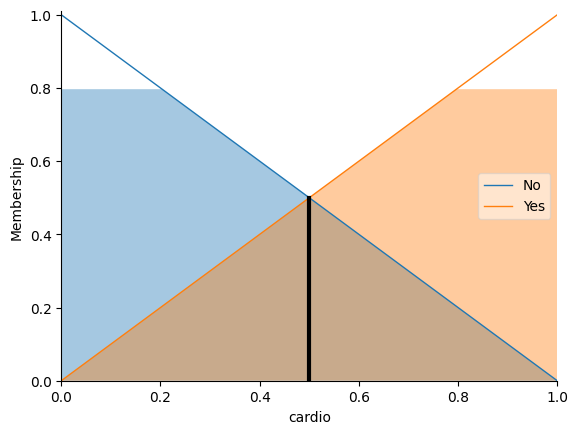

In [10]:
sim.input["age"] = 50.358668
sim.input["ap_hi"] = 110
sim.input["cholesterol"] = 1
sim.input["bmi"] = 21.967120
sim.compute()
sim.print_state()
display(sim.output["cardio"], 1 if sim.output["cardio"] > 0.5 else 0)
cardio.view(sim=sim)

In [11]:
from sklearn.model_selection import train_test_split

random_state = 9

def fuzzy_pred(row):
    sim.input["age"] = row["age"]
    sim.input["ap_hi"] = row["ap_hi"]
    sim.input["cholesterol"] = row["cholesterol"]
    sim.input["bmi"] = row["bmi"]
    sim.compute()
    return  1 if sim.output["cardio"] > 0.5 else 0

y = df["cardio"]
X = df.drop(["cardio"], axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state
)
display(X_train, y_train, X_test, y_test)

age  ap_hi  cholesterol        bmi
id                                             
94960  62.014018    120            1  26.892323
30807  57.745592    120            1  28.393726
26485  59.670354    120            3  23.875115
3868   49.715256    110            1  20.820940
45890  59.785347    160            1  23.529412
...          ...    ...          ...        ...
61975  62.558865    120            1  28.196921
32741  57.882488    120            1  29.043709
94833  51.371701    120            1  29.242109
95660  45.767167    120            1  24.977043
81002  55.544300    150            1  27.053803

[55188 rows x 4 columns]

id
94960    0
30807    0
26485    0
3868     1
45890    1
        ..
61975    1
32741    0
94833    0
95660    0
81002    1
Name: cardio, Length: 55188, dtype: int64

age  ap_hi  cholesterol        bmi
id                                             
42270  60.078305    140            1  45.918367
10780  55.360859    120            2  24.998904
42436  48.198445    100            3  21.926126
88647  41.517906    130            2  27.764650
62336  51.692038    110            1  22.230987
...          ...    ...          ...        ...
30330  47.697404    100            1  22.724403
62907  58.597087    120            1  23.828125
98612  51.404556    110            1  22.589551
5767   62.033184    120            1  23.875115
14769  41.506954    120            2  22.948116

[13797 rows x 4 columns]

id
42270    1
10780    0
42436    1
88647    1
62336    0
        ..
30330    1
62907    0
98612    0
5767     0
14769    1
Name: cardio, Length: 13797, dtype: int64

In [12]:
result_test = X_test.copy()
result_test["Real"] = y_test
result_test = result_test.head(1000)
result_test["Inferred"] = result_test.apply(fuzzy_pred, axis=1)
result_test

age  ap_hi  cholesterol        bmi  Real  Inferred
id                                                             
42270  60.078305    140            1  45.918367     1         1
10780  55.360859    120            2  24.998904     0         0
42436  48.198445    100            3  21.926126     1         0
88647  41.517906    130            2  27.764650     1         0
62336  51.692038    110            1  22.230987     0         0
...          ...    ...          ...        ...   ...       ...
23904  53.942613    120            1  35.491690     1         0
63516  40.305005    120            1  21.829952     0         0
84904  42.561056    140            1  32.882414     1         0
20959  45.545395    160            1  43.827160     1         0
77652  54.115102    140            1  37.105751     0         0

[1000 rows x 6 columns]

In [13]:
from sklearn import metrics

display(
    "Precision_test",
    metrics.precision_score(result_test["Real"], result_test["Inferred"]),
)
display(
    "Recall_test", metrics.recall_score(result_test["Real"], result_test["Inferred"])
)
display(
    "Accuracy_test",
    metrics.accuracy_score(result_test["Real"], result_test["Inferred"]),
)
display(
    "F1_test", 
    metrics.f1_score(result_test["Real"], result_test["Inferred"]),
)
display(
    "Confusion_matrix",
    metrics.confusion_matrix(result_test["Real"], result_test["Inferred"]),
)

'Precision_test'

np.float64(0.5469483568075117)

'Recall_test'

np.float64(0.4707070707070707)

'Accuracy_test'

0.545

'F1_test'

np.float64(0.505971769815418)

'Confusion_matrix'

array([[312, 193],
       [262, 233]])